# Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Reading Dataset

In [39]:
data = pd.read_csv("lr_data.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


## Checking and removing any NULL value if present

In [40]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [41]:
data = data.dropna()

## Splitting data in test and training types 

In [42]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:700]).reshape(199,1)

# <font color="red" size=15px >Linear Regression </font>

## Forward Propogation

y = mx +c    ; where m and c are parameters

In [43]:
def forward_propogation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost Function

<b>Mean squared Error calculations</b><br>
sum(1/2n * ( y - f(x))^2))   

In [44]:
def cost_function (predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5
    return cost

## Gradiant Descent (Backward Propogation)

df = sum(f(x) - y)/n <br>
dm = df*x <br>
dc = df*1

In [45]:
def backward_propogation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output-predictions ) * -1
    dm = np.mean(np.multiply(df, train_input))
    dc= np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives
    

## Update Parameters

m = m - (learning_rate * dm)<br>
c = c - (learning_rate * dc)

In [46]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - (learning_rate*derivatives["dm"])
    parameters["c"] = parameters["c"] - (learning_rate*derivatives["dc"])
    return parameters

# Model Training Function


In [54]:
def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    for i in range(iters):
        
        predictions = forward_propogation(train_input, parameters)
        cost = cost_function(predictions, train_output)
        
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        legend = ax.legend()
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')                
        plt.show()
        derivatives = backward_propogation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training

Iteration = 1, Loss = 2833.7161536921376


<Figure size 640x480 with 0 Axes>

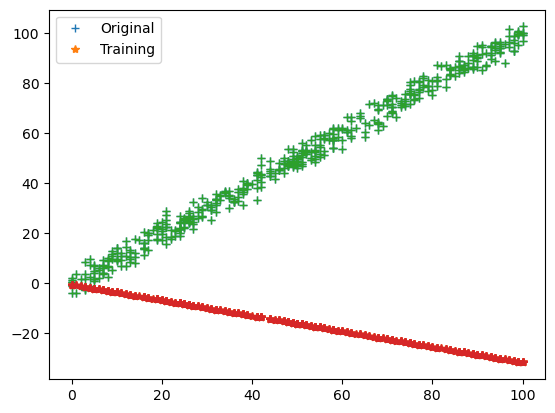

Iteration = 2, Loss = 1548.7420684158974


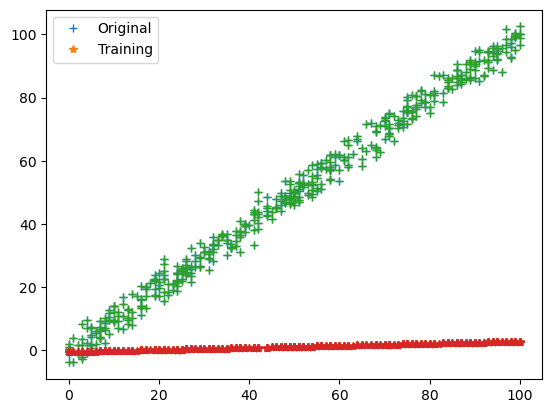

Iteration = 3, Loss = 847.2590476804833


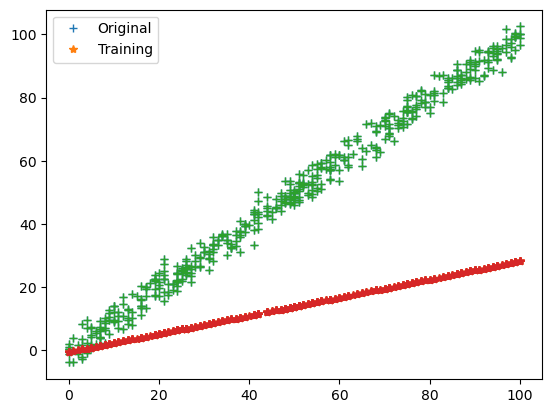

Iteration = 4, Loss = 464.31091342250926


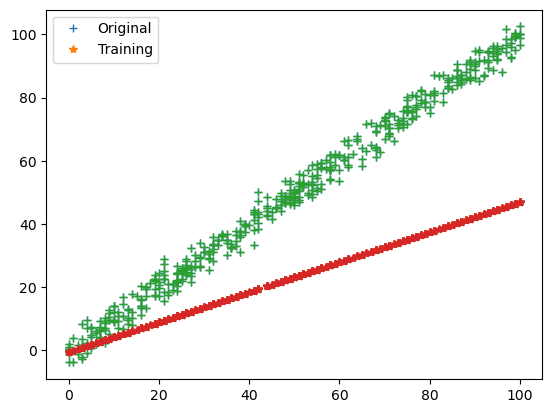

Iteration = 5, Loss = 255.2548575000362


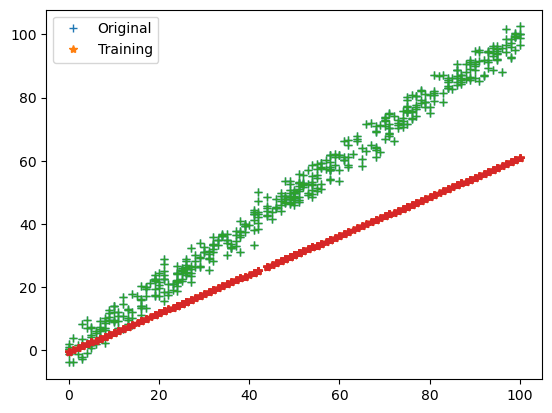

Iteration = 6, Loss = 141.12860735876777


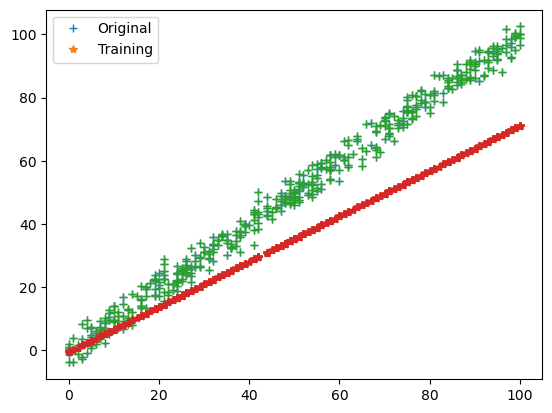

Iteration = 7, Loss = 78.82569564624178


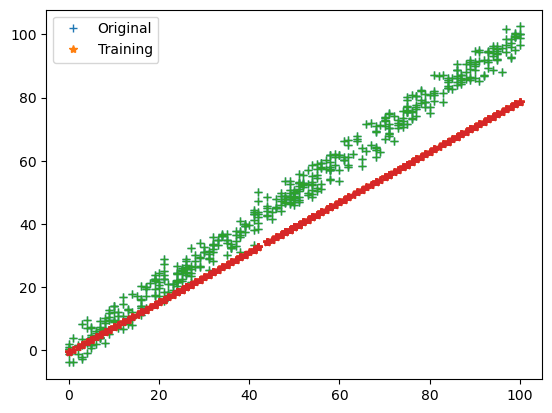

Iteration = 8, Loss = 44.813776249557584


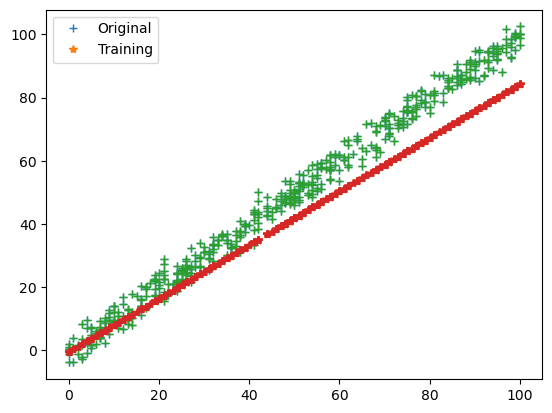

Iteration = 9, Loss = 26.246254502318042


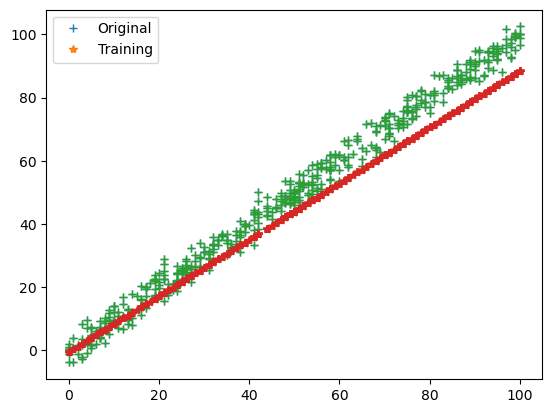

Iteration = 10, Loss = 16.11001774117419


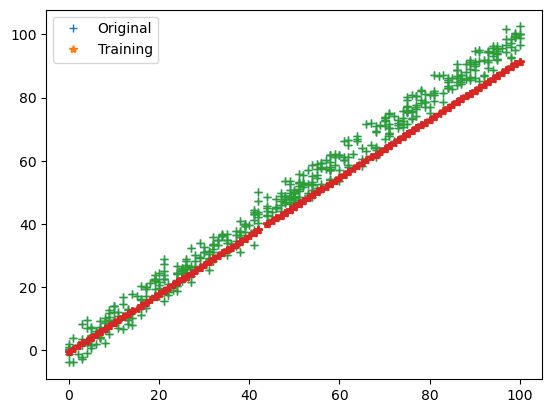

Iteration = 11, Loss = 10.576522254267713


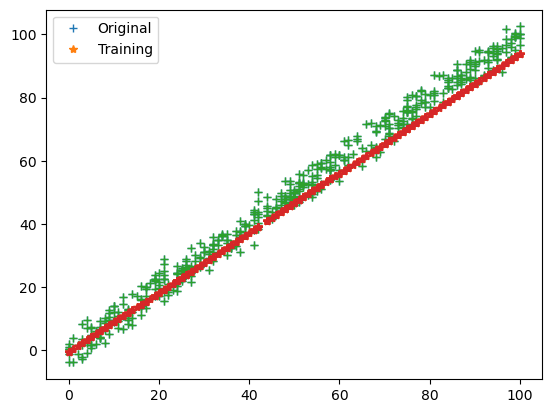

Iteration = 12, Loss = 7.555719348924289


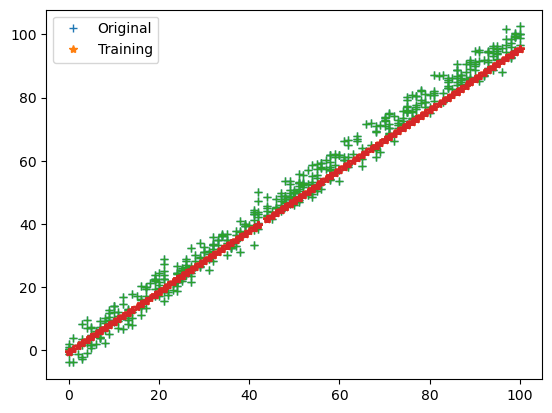

Iteration = 13, Loss = 5.906625960429469


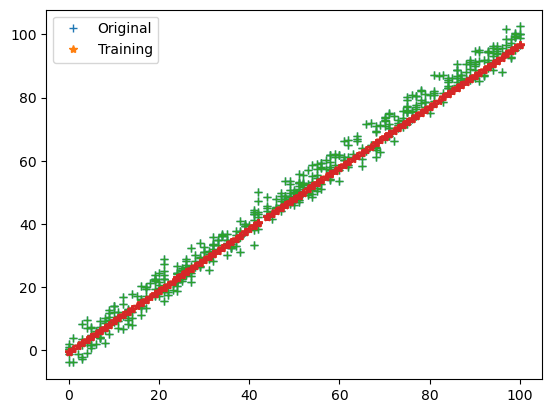

Iteration = 14, Loss = 5.006365522065786


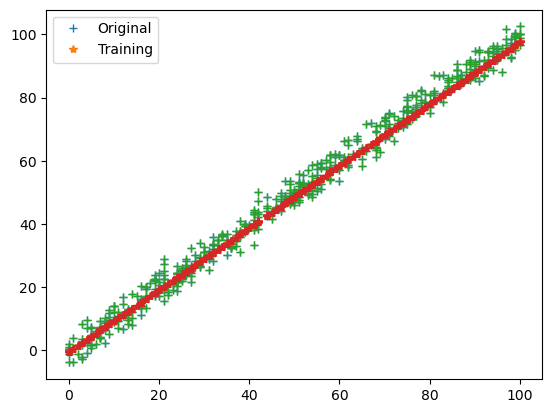

Iteration = 15, Loss = 4.514902121501093


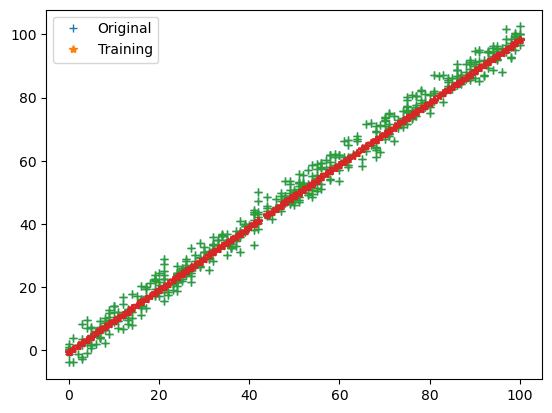

Iteration = 16, Loss = 4.246606008229797


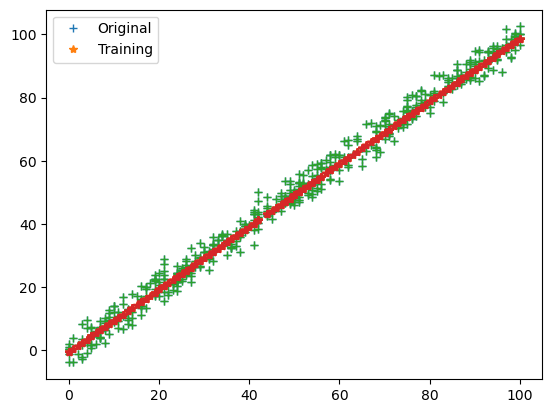

Iteration = 17, Loss = 4.100139638118848


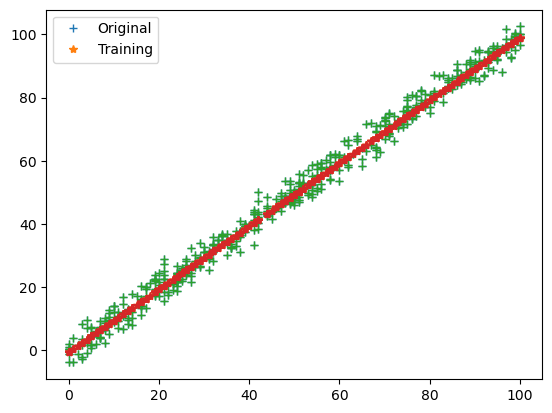

Iteration = 18, Loss = 4.020181610245482


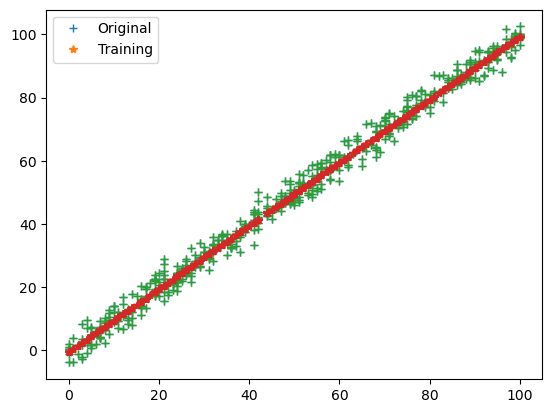

Iteration = 19, Loss = 3.9765312973274614


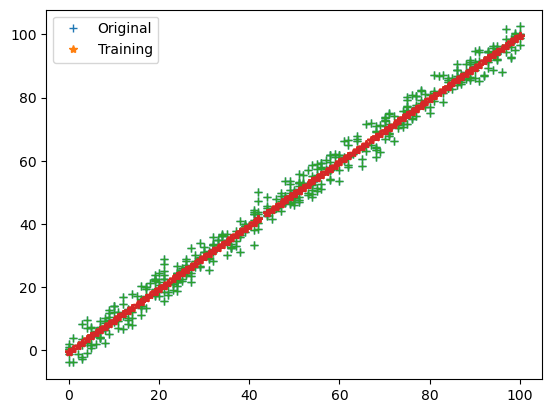

Iteration = 20, Loss = 3.952701808703556


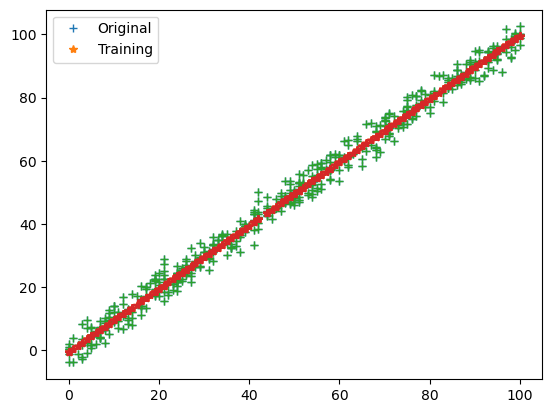

In [56]:
parameters, loss = train(train_input, train_output, 0.00008, 20)

# TESTING THE MODEL

In [57]:
test_predictions = test_input * parameters["m"] + parameters["c"]

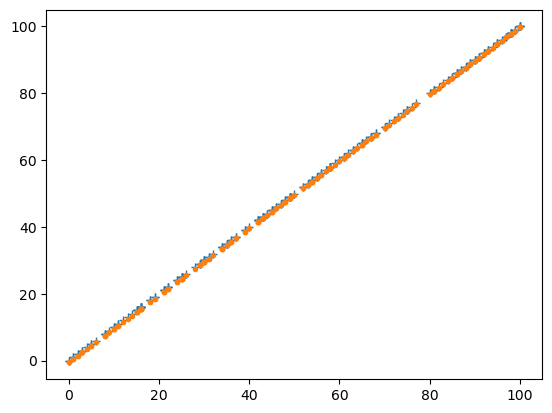

In [58]:
plt.plot(test_input, test_output,"+")
plt.plot(test_input, test_predictions,".")


plt.show()

## Cost for test data


In [59]:
cost_function(test_predictions, test_output)

0.09040562740994765

# Predicted Parameters

In [60]:
parameters

{'m': 1.002896412020216, 'c': -0.5657919481786029}